# <b>RQ3: Is the correlation found between form and meaning an artifact of the way the baseline is constructed?</b>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from config import Globals
import preprocess_funcs
import distance_funcs

In [2]:
os.chdir("c:/Users/Raya/OneDrive/Documents/3-CSAI/CSAI-Y3-S2/Thesis/Replication")

In [3]:
avg_dist_dir = os.path.join("results", "avg_distances")
avg_dist_files = [os.path.join(avg_dist_dir, file) for file in os.listdir(avg_dist_dir)]
print(avg_dist_files)

['results\\avg_distances\\avg_dist_abs.csv', 'results\\avg_distances\\avg_dist_ang.csv', 'results\\avg_distances\\avg_dist_none.csv', 'results\\avg_distances\\avg_dist_norm.csv']


In [4]:
globals = Globals()

# Studying edit space, semantic space and their relation

## Scatterplot avg edit dist vs. avg edit dist

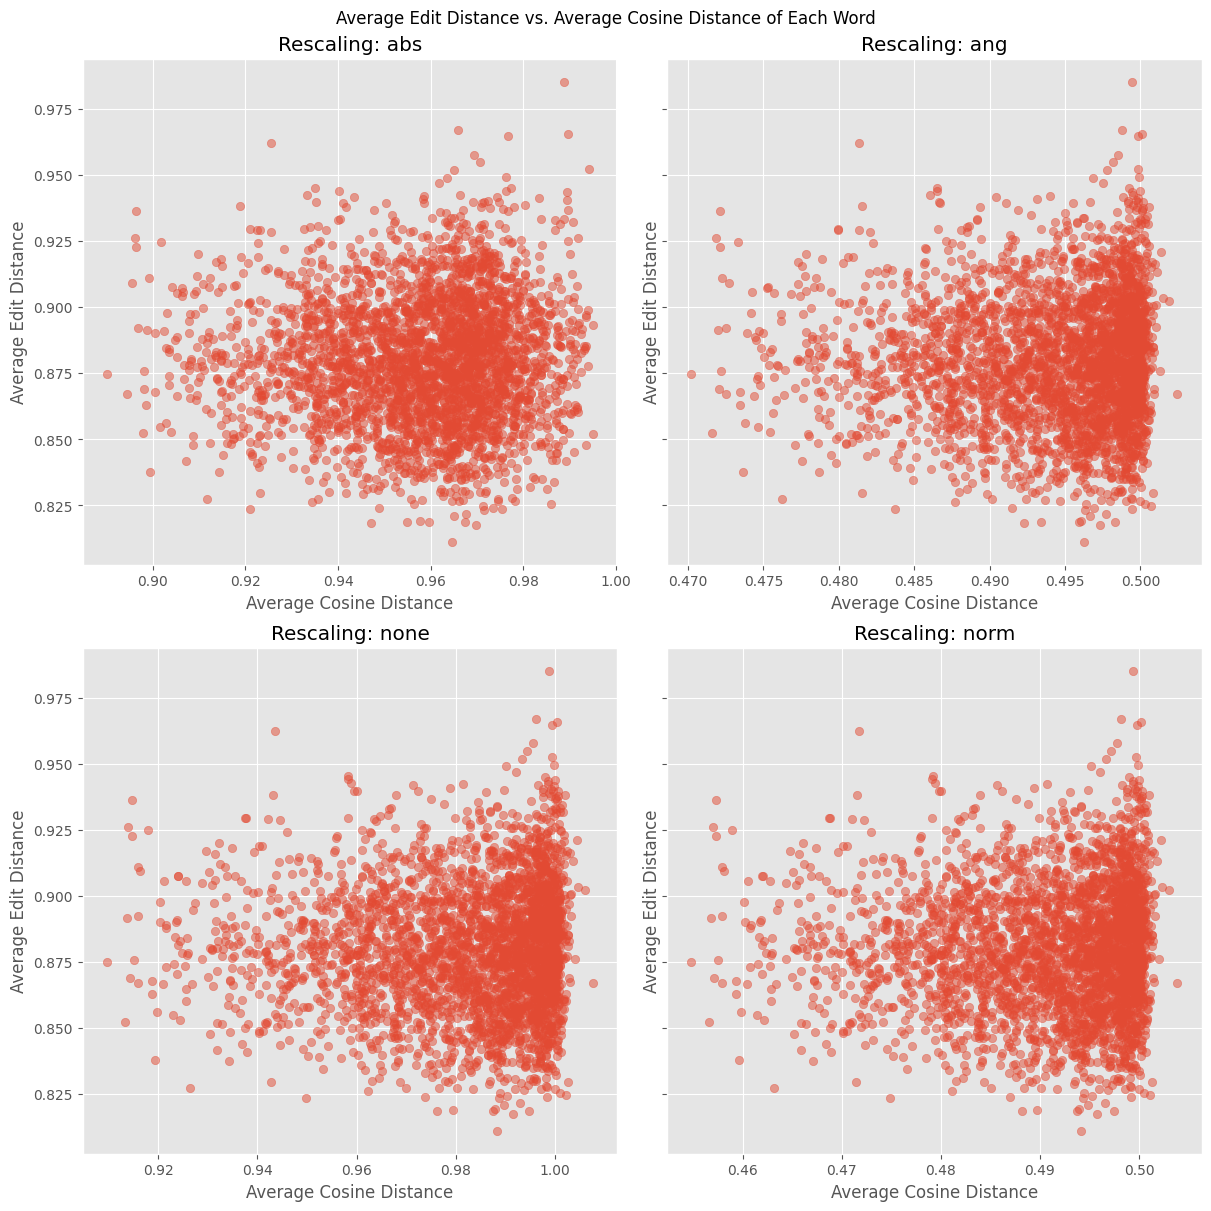

In [5]:
plt.style.use('ggplot')
# Create subplots: one for each rescaling method
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True, constrained_layout=True)
# Set title for the figure
fig.suptitle('Average Edit Distance vs. Average Cosine Distance of Each Word')
# Flatten the 2D array of axes to a 1D array for easier indexing
axes = axes.flatten()

# Loop through each CSV file and corresponding rescaling method
for i, (rescaling, file) in enumerate(zip(sorted(globals.rescaling_types_abrev), sorted(avg_dist_files))):
    # Initialize lists to store the data
    avg_cos_dists = []
    avg_edit_dists = []
    
    # Read the data from the CSV file
    df = pd.read_csv(file)
    
    # Extract the average cosine distance and average edit distance
    avg_cos_dists.extend(df['global_avg_cos_dist'].values)
    avg_edit_dists.extend(df['global_avg_norm_edit_dist'].values)
    
    # Plot the data in the corresponding subplot
    axes[i].scatter(avg_cos_dists, avg_edit_dists, alpha=0.5)
    
    # Add labels
    axes[i].set_xlabel('Average Cosine Distance')
    axes[i].set_ylabel('Average Edit Distance')
    axes[i].set_title(f'Rescaling: {rescaling}')
    
    # Add a grid for better visualization
    axes[i].grid(True)

# Show the figure with all subplots
plt.show()


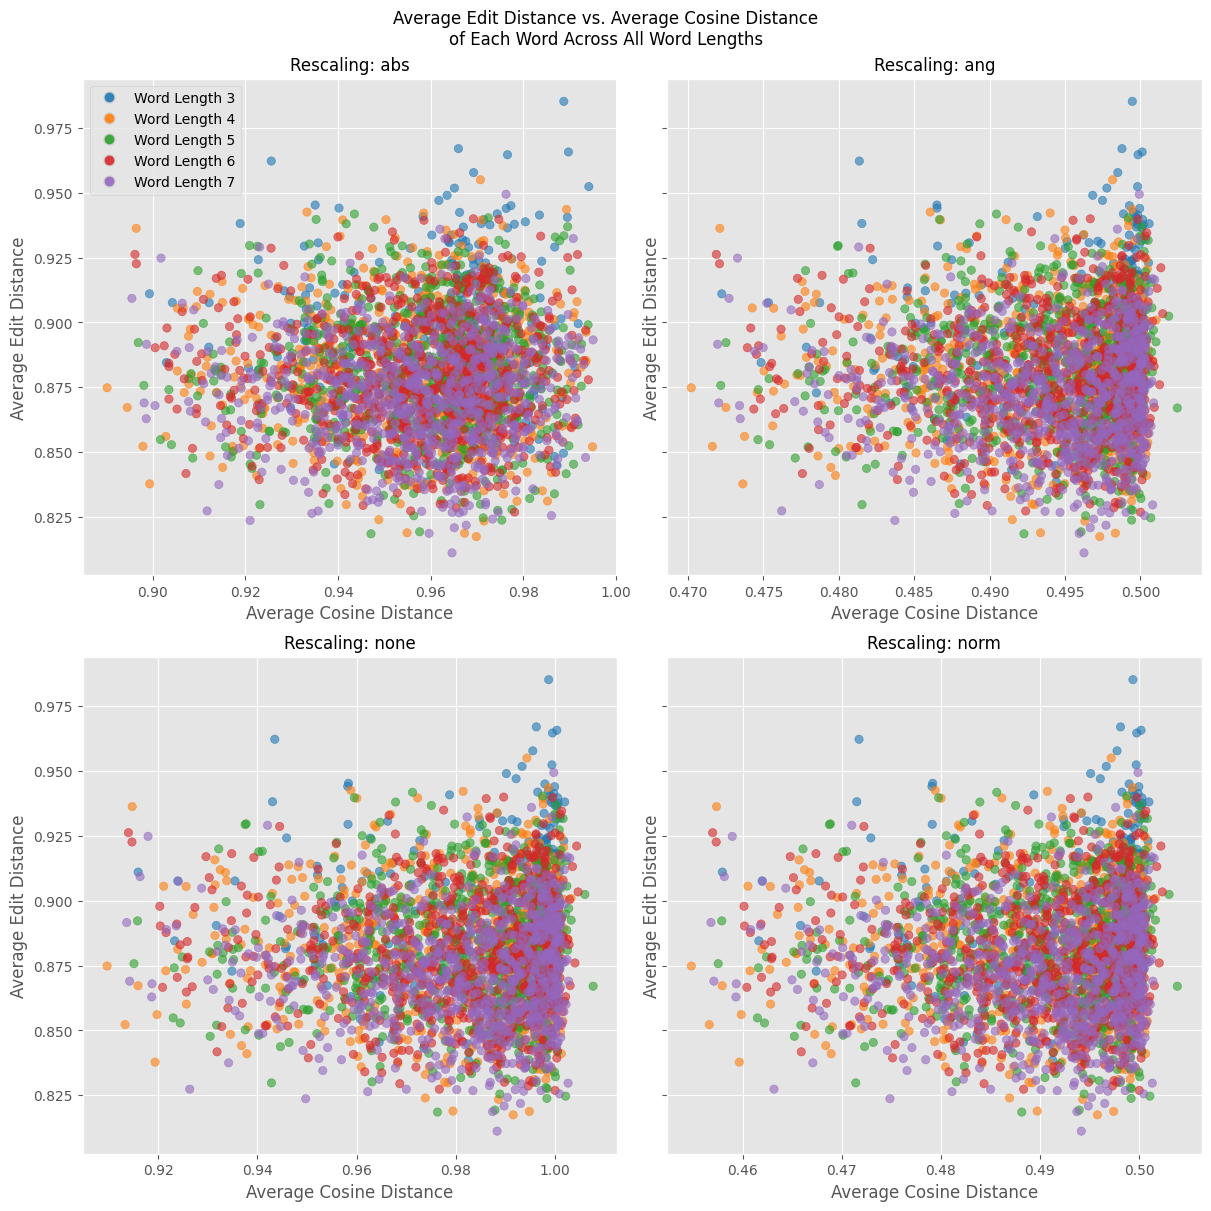

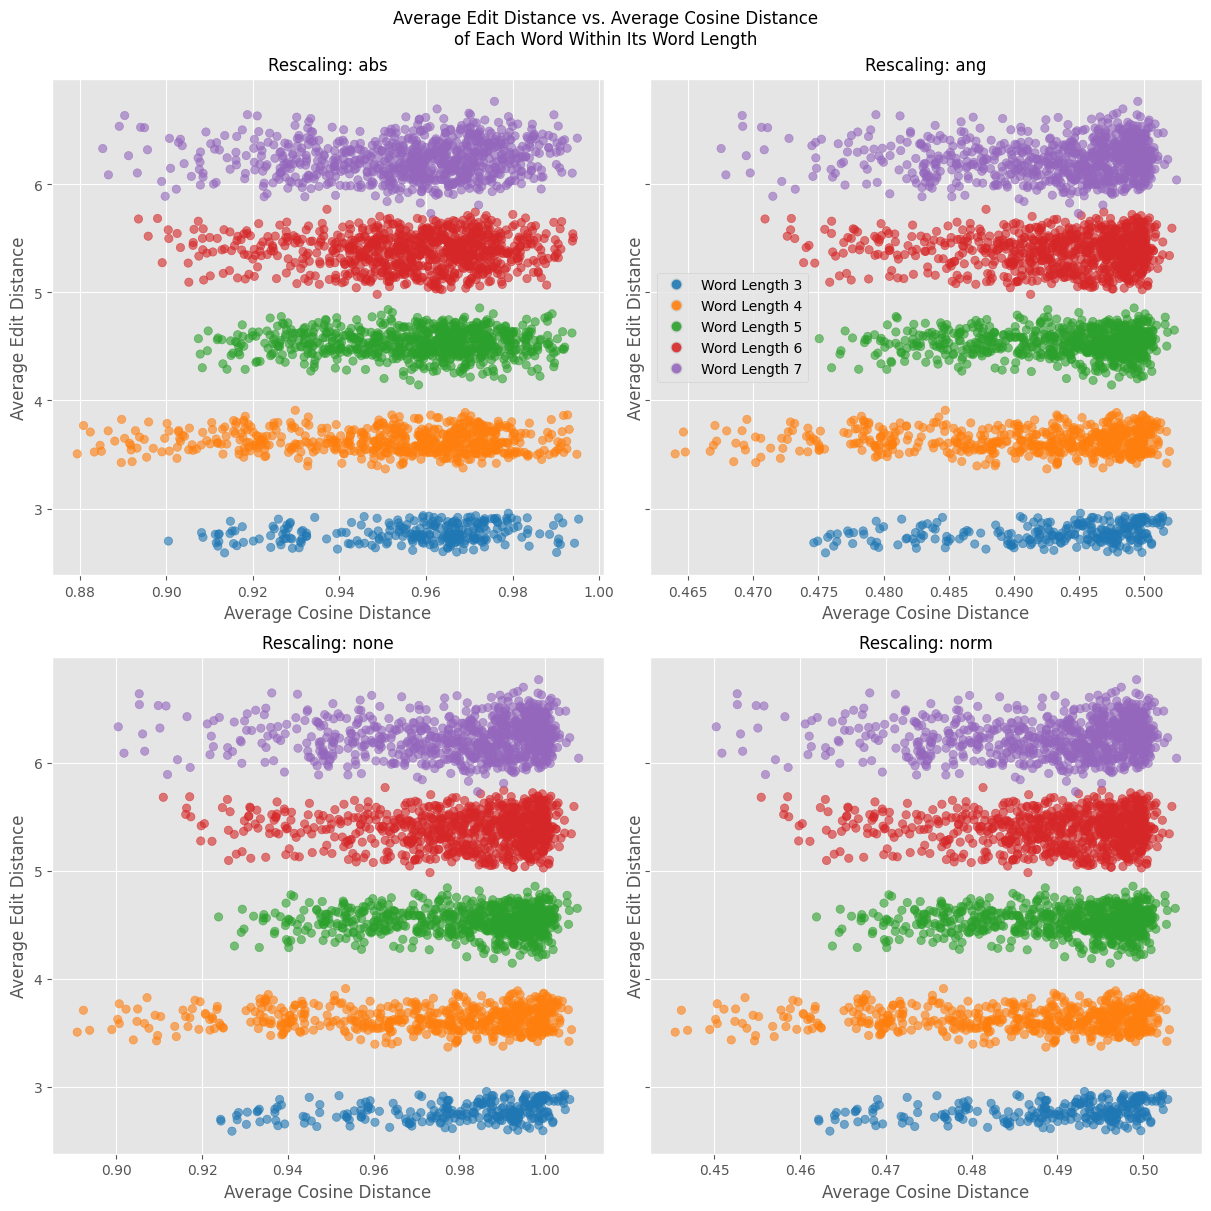

In [6]:
# Same as the above but with different colors for the different word lenghts

def scatter_avg_dist(local_dist=True, log_cos_sim=False, savefig=False, output_file=None):
    # Create subplots: one for each rescaling method
    fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True, constrained_layout=True)
    # Add a title to the entire figure
    config = {'local_dist':'Within Its Word Length',
              'global_dist':'Across All Word Lengths'}
    config_str = config['local_dist'] if local_dist else config['global_dist']
    fig.suptitle(f'Average Edit Distance vs. Average Cosine Distance\nof Each Word {config_str}')
    # Flatten the 2D array of axes to a 1D array for easier indexing
    axes = axes.flatten()
    
    # Define a color map to use for different word lengths
    cmap = plt.get_cmap('tab10')  
    # Map each word length to a color index in the color map
    word_length_colors = {wl: cmap(i) for i, wl in enumerate(globals.word_lengths)}
    
    # Loop through each CSV file and corresponding rescaling method
    for i, (rescaling, file) in enumerate(zip(sorted(globals.rescaling_types_abrev), sorted(avg_dist_files))):
        # Read the data from the CSV file
        df = pd.read_csv(file)
        
        # Extract the average cosine distance, average edit distance, and word lengths
        if local_dist:
            avg_cos_dists = df['local_avg_cos_dist'].values
            avg_edit_dists = df['local_avg_raw_edit_dist'].values            
        else:
            avg_cos_dists = df['global_avg_cos_dist'].values
            avg_edit_dists = df['global_avg_norm_edit_dist'].values
        word_lengths = df['word_length'].values
        
        # Create a list of colors based on the word length using the color map
        colors = [word_length_colors[wl] for wl in word_lengths]
        
        # Plot the data in the corresponding subplot
        axes[i].scatter(avg_cos_dists, avg_edit_dists, c=colors, alpha=0.6)
        
        # If specified, set the x-axis to a logarithmic scale
        if log_cos_sim:
            axes[i].set_xscale('log')
        
        # Customize the subplot
        axes[i].set_xlabel('Average Cosine Distance')
        axes[i].set_ylabel('Average Edit Distance')
        axes[i].set_title(f'Rescaling: {rescaling}', fontsize=12)
        axes[i].grid(True)
        
        # Add a legend for word lengths in the first subplot
        if local_dist:
            if i == 1:
                handles = [plt.Line2D([0], [0], marker='o', color='lightgrey', label=f'Word Length {wl}', markerfacecolor=color, markersize=8, linestyle='None', alpha=0.9) for wl, color in word_length_colors.items()]
                axes[i].legend(handles=handles, loc='center left')
        else:
            if i == 0:
                handles = [plt.Line2D([0], [0], marker='o', color='lightgrey', label=f'Word Length {wl}', markerfacecolor=color, markersize=8, linestyle='None', alpha=0.9) for wl, color in word_length_colors.items()]
                axes[i].legend(handles=handles, loc='upper left')
        
    # Show the figure with all subplots
    plt.show()

scatter_avg_dist(local_dist=False)
scatter_avg_dist(local_dist=True)

## t-SNE of embeddings colored by avg edit dist

c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Raya\AppData\Local\Temp\ipykernel_11420\3281256235.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter)


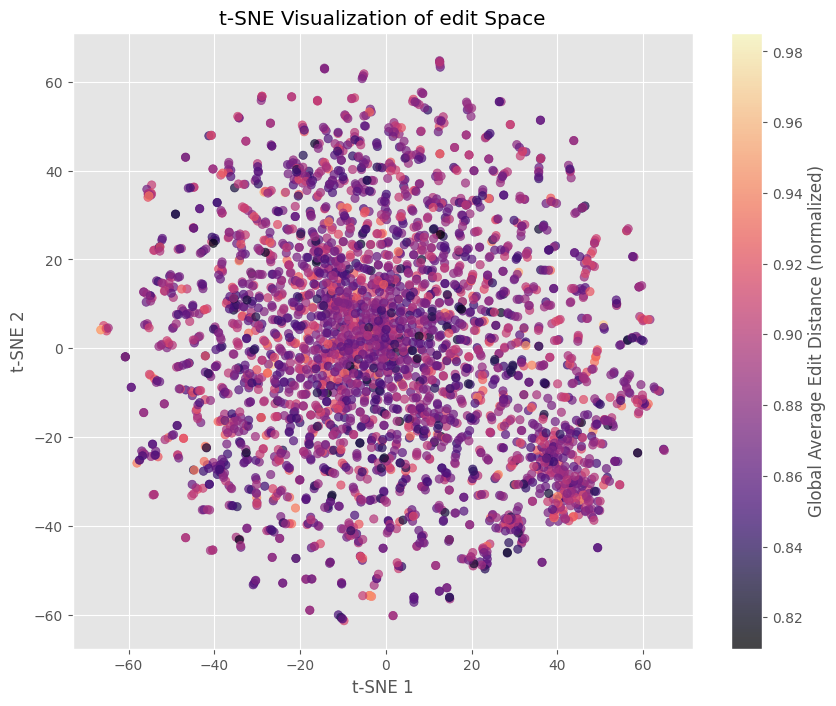

c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Raya\AppData\Local\Temp\ipykernel_11420\3281256235.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter)


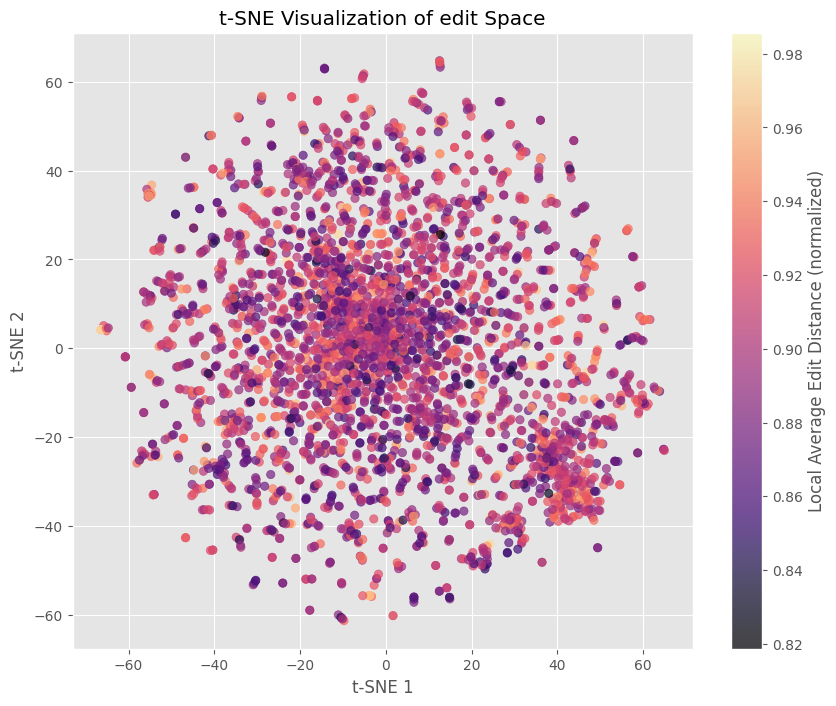

In [10]:
# Load vocabulary
full_vocab = preprocess_funcs.load_vocabulary()
word_ids_by_wordlength = preprocess_funcs.word_ids_by_word_length(full_vocab)
# print(f"Full vocabulary size: {len(full_vocab)}")

# Select only words of length 3-7
word_ids = []
for length, ids in word_ids_by_wordlength.items():
    word_ids.extend(ids)
vocab = {id:full_vocab[id] for id in word_ids}
# print(f"Selected vocabulary size: {len(vocab)}")

# Fetch the selected words and their embeddings
words = list(vocab.values())
embeddings_dict = preprocess_funcs.get_vocabulary_embeddings_dict(vocab)
vects = np.array([embeddings_dict[id] for id in word_ids])
# print(f"Nb of words: {len(words)}")
# print(f"Vectors array shape: {vects.shape}")

def tSNE(file, local):
    # Read the data from the CSV file
    df = pd.read_csv(file)

    # Extract average edit distances
    if local:
        avg_edit_dists_raw = np.array(df['local_avg_raw_edit_dist'].tolist())
        word_lengths = np.array(df['word_length'].tolist())
        avg_edit_dists = avg_edit_dists_raw / word_lengths
    else:
        avg_edit_dists = np.array(df['global_avg_norm_edit_dist'].tolist())

    # Normalize average edit distances for color mapping
    # scaler = MinMaxScaler()
    # avg_edit_dists_normalized = scaler.fit_transform(avg_edit_dists.reshape(-1, 1)).ravel()
    # TODO: probit aka z (or logit) transform edit

    # Apply t-SNE to the word embeddings
    tsne = TSNE(n_components=2, random_state=42)
    tsne_embeddings = tsne.fit_transform(vects)

    # Create a scatter plot of the t-SNE embeddings
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=avg_edit_dists, cmap='magma', alpha=0.7)

    # Add color bar for average edit distance
    cbar = plt.colorbar(scatter)
    if local:
        cbar.set_label('Local Average Edit Distance (normalized)')
    else:
        cbar.set_label('Global Average Edit Distance (normalized)')

    # Add labels and title
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('t-SNE Visualization of Form Space')

    # Show the plot
    plt.show()

# Loop through each CSV file and read the data
# for file in avg_dist_files:
file = avg_dist_files[0]
print(file)

tSNE(file, local=False)
tSNE(file, local=True)

c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sk

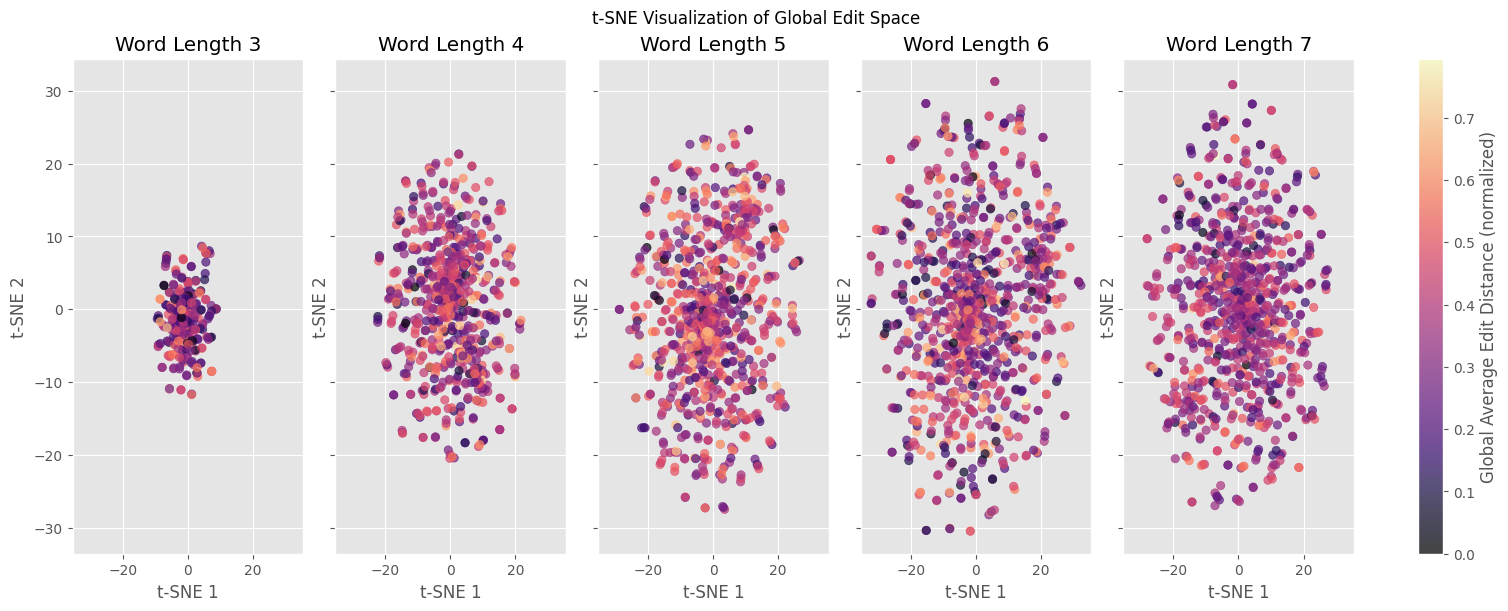

c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Raya\Downloads\Python\lib\site-packages\sk

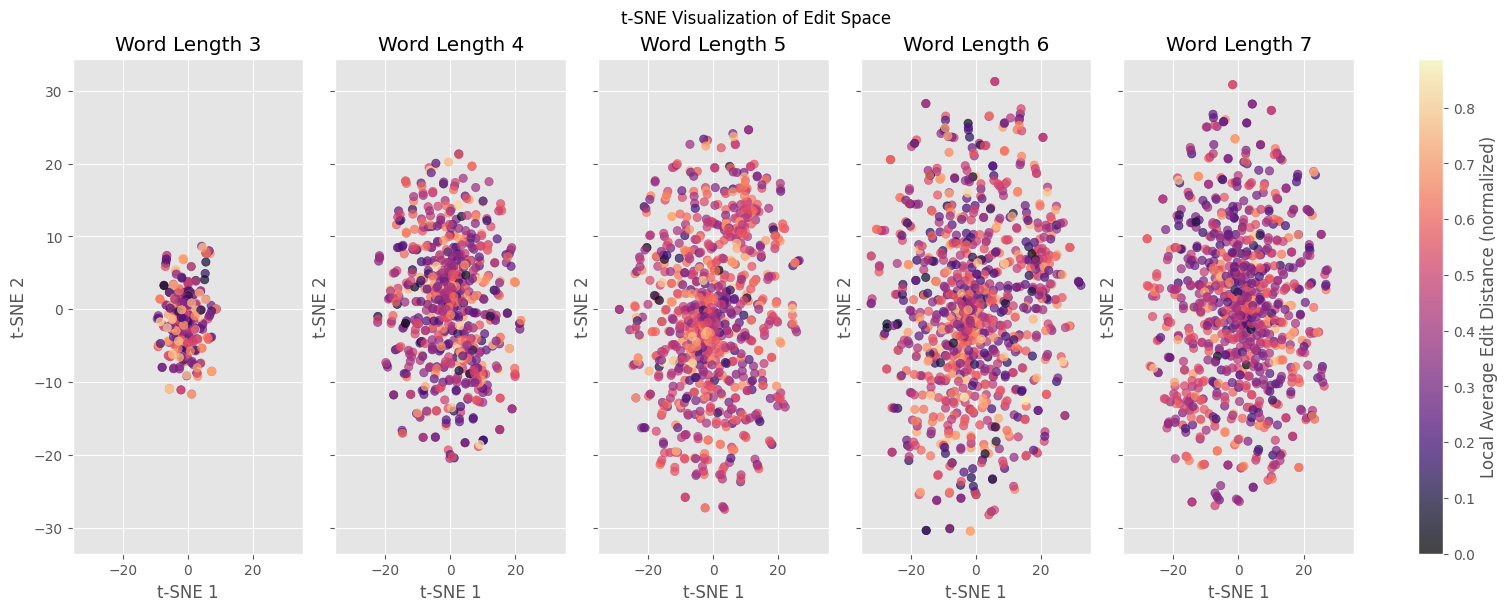

In [11]:
# Load vocabulary
full_vocab = preprocess_funcs.load_vocabulary()
word_ids_by_wordlength = preprocess_funcs.word_ids_by_word_length(full_vocab)

# Select only words of length 3-7
selected_lengths = list(range(3, 8))  # Word lengths 3-7
word_ids = []
for length, ids in word_ids_by_wordlength.items():
    if length in selected_lengths:
        word_ids.extend(ids)

vocab = {id: full_vocab[id] for id in word_ids}

# Fetch the selected words and their embeddings
words = list(vocab.values())
embeddings_dict = preprocess_funcs.get_vocabulary_embeddings_dict(vocab)
vects = np.array([embeddings_dict[id] for id in word_ids])

def tSNE(file, local):
    # Read the data from the CSV file
    df = pd.read_csv(file)

    # Extract average edit distances and word lengths
    if local:
        avg_edit_dists_raw = np.array(df['local_avg_raw_edit_dist'].tolist())
        word_lengths = np.array(df['word_length'].tolist())
        avg_edit_dists = avg_edit_dists_raw / word_lengths
    else:
        avg_edit_dists = np.array(df['global_avg_norm_edit_dist'].tolist())
    
    # Normalize average edit distances for color mapping
    scaler = MinMaxScaler()
    avg_edit_dists_normalized = scaler.fit_transform(avg_edit_dists.reshape(-1, 1)).ravel()
    
    # Initialize subplots: one subplot for each word length in selected_lengths
    fig, axes = plt.subplots(1, len(selected_lengths), figsize=(15, 6), sharey=True, sharex=True, constrained_layout=True)
    
    # Iterate through each word length and create a subplot
    for i, word_length in enumerate(selected_lengths):
        # Filter data and embeddings based on the current word length
        mask = df['word_length'] == word_length
        filtered_embeddings = vects[mask]
        filtered_edit_dists = avg_edit_dists_normalized[mask]
        
        # Apply t-SNE to the filtered word embeddings
        tsne = TSNE(n_components=2, random_state=42)
        tsne_embeddings = tsne.fit_transform(filtered_embeddings)
        
        # Create a scatter plot of the t-SNE embeddings in the current subplot
        scatter = axes[i].scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=filtered_edit_dists, cmap='magma', alpha=0.7)
        
        # Add color bar for average edit distance
        if i == len(selected_lengths) - 1:  # Add colorbar to the last subplot only
            cbar = fig.colorbar(scatter, ax=axes, orientation='vertical')
            if local:
                cbar.set_label('Local Average Edit Distance (normalized)')
            else:
                cbar.set_label('Global Average Edit Distance (normalized)')
        
        # Add labels and title to the current subplot
        axes[i].set_xlabel('t-SNE 1')
        axes[i].set_ylabel('t-SNE 2')
        axes[i].set_title(f'Word Length {word_length}')
        
    # Set the overall title for the figure
    title = 't-SNE Visualization of Edit Space' if local else 't-SNE Visualization of Global Edit Space'
    fig.suptitle(title)

    # Show the plot
    plt.show()

# Loop through each CSV file and read the data
file = avg_dist_files[0]

tSNE(file, local=False)
tSNE(file, local=True)

## Boxplot avg cos dist of words within bins

In [ ]:
def bin_vects_by_avg_cos_dist(word_ids, embeddings, rescaling, num_bins=4):
    """
    Organizes word embeddings into bins based on their average cosine similarity.

    Parameters:
        word_ids (list): A list of word IDs corresponding to the embeddings.
        embeddings (np.ndarray): A 2D array of word embeddings, each row representing a word vector.
        rescaling (optional): Whether to rescale the embeddings.
                                    Options: None, 'abs_cos_sim', 'norm_cos_sim', 'angular_dist'.
        num_bins (int, optional): The number of bins to organize the vectors into. Defaults to 4.

    Returns:
        dict: A dictionary where keys are bin indices (from 0 to num_bins - 1), and values are dictionaries
        mapping word IDs to their corresponding vectors within each bin.

    Description:
        The function calculates all pairwise cosine distances between word embeddings and computes the average 
        cosine distance for each embedding. Then, it sorts the vectors and word IDs based on their average distance. 
        It divides the sorted vectors and word IDs into the specified number of bins. Each bin contains a 
        dictionary where keys are word IDs and values are their corresponding word vectors.

    Note: In case `num_bins` is 1, the function will return one bin containing all the vectors.
    """    
    # Calculate pairwise cosine distances
    all_pairwise_distances = distance_funcs.cosine_distances_matrix(embeddings, rescaling)
    # Calculate average cosine distance for each vector
    avg_distances = distance_funcs.average_distances(all_pairwise_distances)
    
    # Sort vectors based on their average distance and word_ids (in ascending order -> first index corresponds to smallest distance)
    sorted_indices = np.argsort(avg_distances)
    sorted_vects = embeddings[sorted_indices]
    sorted_word_ids = [word_ids[i] for i in sorted_indices]
    # print(f"Sorted word IDs: {sorted_word_ids}")
    
    # Calculate bin size such that vectors are equally distributed across all bins
    n = len(sorted_vects)
    bin_size = n // num_bins
    
    # Initialize a dictionary to represent bins. The values will be dictionaries mapping sorted word IDs to vectors
    bins = {i: {} for i in range(num_bins)}
    
    # Distribute the sorted word IDs and vectors into the bins
    for i in range(num_bins):
        # Set the starting index for the bin
        start_idx = i * bin_size
        # Set the final index for the bin
        if i == num_bins-1:  # For the last bin, include all remaining vectors
            end_idx = n
        else:
            end_idx = (i + 1) * bin_size
        
        # Slice the vectors and word IDs for the current bin
        bin_vects = sorted_vects[start_idx:end_idx]
        bin_word_ids = sorted_word_ids[start_idx:end_idx]
        # print(f"IDs for bin {i}: {bin_word_ids}")
        
        # Append the word IDs and corresponding vectors to the current bin
        for id, vect in zip(bin_word_ids, bin_vects):
            bins[i][id] = vect
    
    # Return the bins
    return bins# Goal: Plot the average cosine distance of the words in each bin, for each word length and each rescaling


def get_bin_avg_dist(local=True):
    # Initialize dictionary to store results
    results = {rescaling: {} for rescaling in globals.rescaling_types_abrev}

    for rescaling, file in zip(sorted(globals.rescaling_types_abrev), sorted(avg_dist_files)):
        # Read file and extract average cosine distances
        df = pd.read_csv(file)
        
        # Iterate over word lengths
        for word_length, ids in word_ids_by_wordlength.items():
            df_current_wl = df[df['word_length'] == word_length]
            
            # Retrieve words vectors for the current word length
            vects = np.array([embeddings_dict[id] for id in ids])
            
            # Bin the vectors in 4 bins based on their average cosine distance 
            rescaling_string = globals.rescaling_types_dict[rescaling]
            bins = bin_vects_by_avg_cos_dist(ids, vects, rescaling=rescaling_string) # `bin` is a dict of the editat { bin_nb: {id: vect} }
            
            # Initialize results dictionary for the current word length
            if word_length not in results[rescaling]:
                results[rescaling][word_length] = {'cos':{}, 'edit':{}}
            
            # Get the average cosine distance of the words in each bin
            for bin_nb, data in bins.items():
                bin_ids = data.keys()
                bin_avg_cos_dists = [df_current_wl[df_current_wl['id'] == id]['local_avg_cos_dist'].values[0] for id in bin_ids]
                bin_avg_edit_dists = [df_current_wl[df_current_wl['id'] == id]['local_avg_raw_edit_dist'].values[0] for id in bin_ids]
                results[rescaling][word_length]['cos'][f'bin{bin_nb}'] = bin_avg_cos_dists
                results[rescaling][word_length]['edit'][f'bin{bin_nb}'] = bin_avg_edit_dists
    return results

In [ ]:
results = get_bin_avg_dist()
print(results['none'][3]['cos'].keys())

dict_keys(['bin0', 'bin1', 'bin2', 'bin3'])


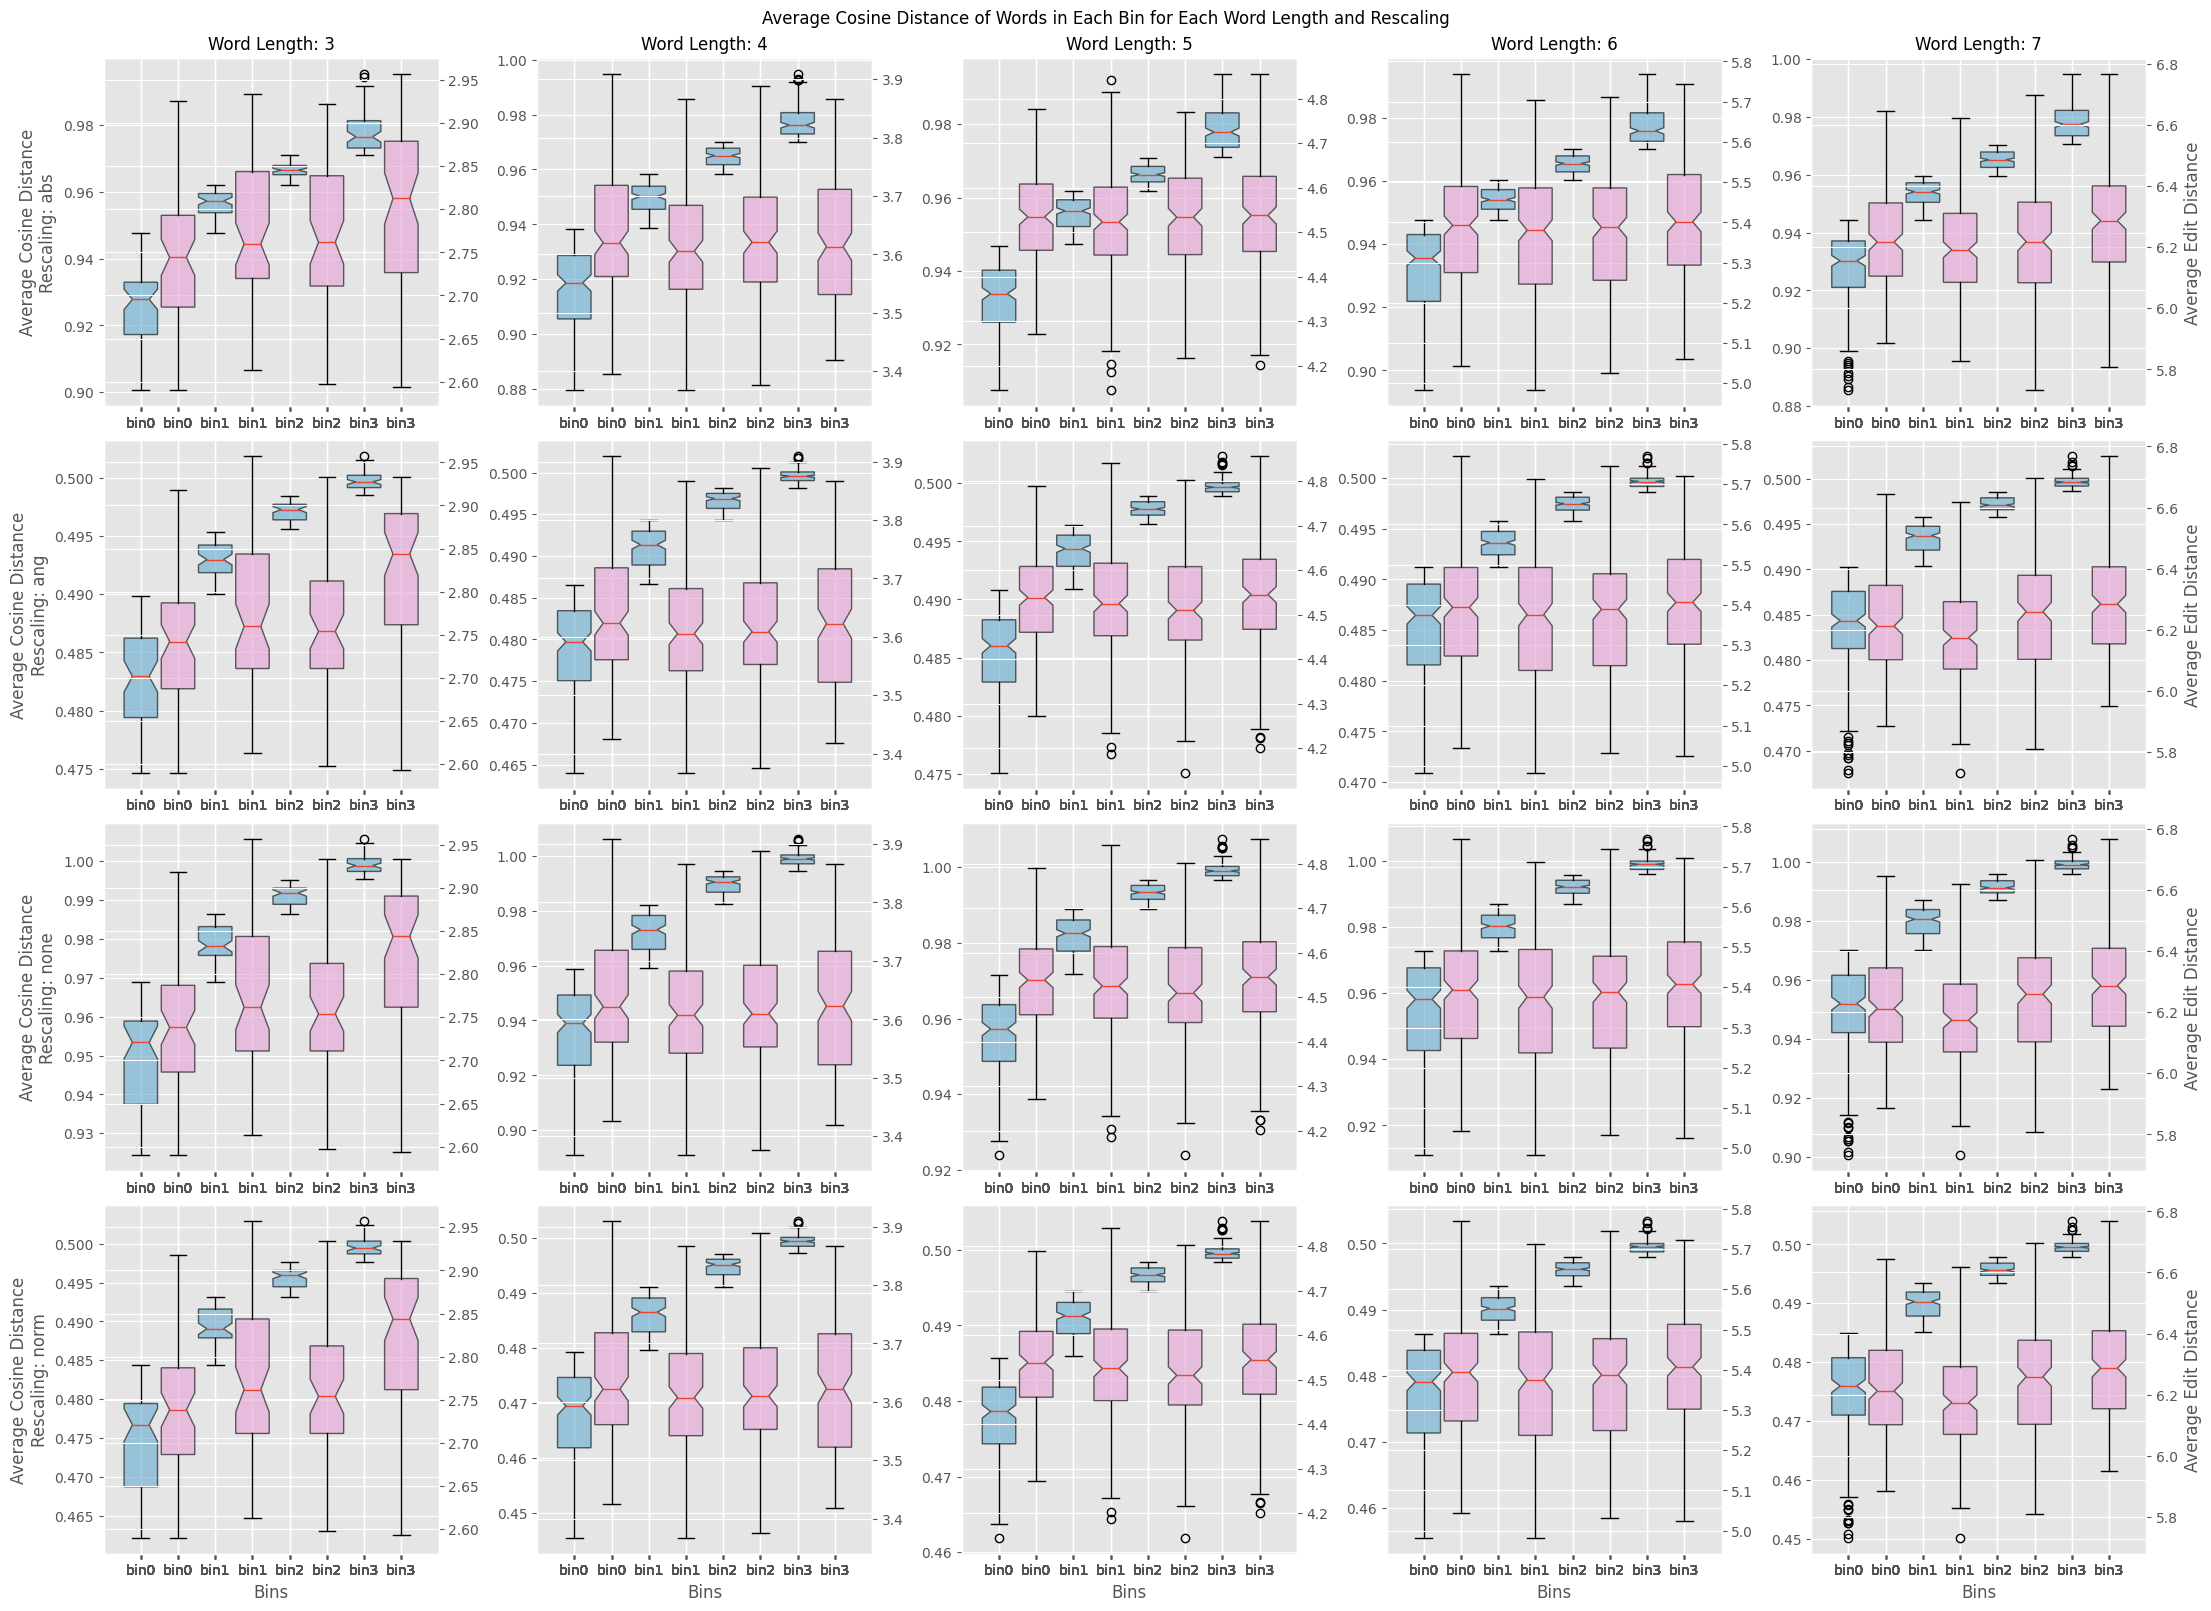

In [ ]:
# Define the number of rows and columns for the subplots
num_rescalings = len(globals.rescaling_types_abrev)
num_word_lengths = len(globals.word_lengths)

# Create subplots: each row for a rescaling type, each column for a word length
fig, axes = plt.subplots(num_rescalings, num_word_lengths, figsize=(22, 16), sharex=True, constrained_layout=True)

# Add a title to the entire figure
fig.suptitle('Average Cosine Distance of Words in Each Bin for Each Word Length and Rescaling')

# Define the rescaling types and word lengths
rescaling_types = sorted(globals.rescaling_types_abrev)
word_lengths = globals.word_lengths

# Loop through each rescaling type (rows) and each word length (columns)
for row, rescaling in enumerate(rescaling_types):
    for col, word_length in enumerate(word_lengths):
        # Retrieve the current axis in the grid
        ax_cos = axes[row, col]
        
        # Create a secondary y-axis for average edit distance
        ax_edit = ax_cos.twinx()
        
        # Share the x-axis between the primary and secondary y-axes
        ax_edit.get_shared_x_axes().join(ax_edit, ax_cos)
        
        # Retrieve data for the current rescaling and word length
        bins_data = results.get(rescaling, {}).get(word_length, {})
        
        # Prepare data and labels for box plots
        cos_dist_data = []
        edit_dist_data = []
        bin_labels = []
        
        # Loop through bins and collect data
        for bin_label in bins_data['cos'].keys():
            # Retrieve data for the current bin
            avg_cos_dists = bins_data['cos'][bin_label]
            avg_edit_dists = bins_data['edit'][bin_label]
            
            # Append the data and labels for the box plots
            cos_dist_data.append(avg_cos_dists)
            edit_dist_data.append(avg_edit_dists)
            bin_labels.append(bin_label)
        
        # Create box plot for average cosine distance on the left y-axis (primary axis)
        ax_cos.boxplot(cos_dist_data, labels=bin_labels, notch=True, patch_artist=True,
                       boxprops={'facecolor': '#63abce', 'alpha': 0.6}, medianprops={'color': '#ee442f'}, 
                       positions=[pos - 0.25 for pos in list(range(len(bin_labels)))])
        
        # Create box plot for average edit distance on the right y-axis (secondary axis)
        ax_edit.boxplot(edit_dist_data, labels=bin_labels, notch=True, patch_artist=True,
                        boxprops={'facecolor': '#e6a1d7', 'alpha': 0.6}, medianprops={'color': '#ee442f'},
                        positions=[pos + 0.25 for pos in list(range(len(bin_labels)))])
        
        # Add labels
        if row == 0:
            ax_cos.set_title(f'Word Length: {word_length}', fontsize=12)
        if row == num_rescalings - 1:
            ax_cos.set_xlabel('Bins')
        if col == 0:
            ax_cos.set_ylabel(f'Average Cosine Distance\nRescaling: {rescaling}')
        if col == num_word_lengths - 1:
            ax_edit.set_ylabel('Average Edit Distance')
        
        # Ensure x-tick labels are visible on each subplot
        ax_cos.tick_params(axis='x', labelbottom=True)
        ax_edit.tick_params(axis='x', labelbottom=True)
        
        # Add a grid for readability in both y-axes
        ax_cos.grid(True)
        ax_edit.grid(True)

# Show the figure with all subplots
plt.show()